### 5.MUH APRIADI MAKMUR_220907501022

### IMPORT MODUL 

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from statsmodels.stats.diagnostic import het_breuschpagan

# UJi Autokorelasi
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# UJI Heteroskedastisitas 
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# UJI Mulikolonieritas
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Algortima Regresi dengan paket STATMODEL
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Load Data Via URL (Github)

In [2]:
data_ryan = pd.read_csv('https://raw.githubusercontent.com/paktitohayunanda/muh-apriadi-makmur/main/data_ryan.csv ')
data_ryan = pd.DataFrane()

,X1,X2,Y
0,50,20,60
1,40,25,55
2,60,30,65
3,55,35,70
4,45,40,62
5,65,50,75
6,70,55,80
7,75,60,85
8,80,65,90
9,90,70,95


### Memisahkan Variable Independen Dan Variable Dependen¶

In [3]:
# Variable Prediktor
X = data_ryan[['X1','X2']]

# Variable Target
y = data_ryan['Y']

### Membuat Model Regression

In [4]:
regressi = LinearRegression()
regressi.fit(X,y)

LinearRegression()

### Menampilkan koefisien dan intercept dari model regressi yang kita buat sebelumnya

In [5]:
coef_x1 = regressi.coef_[0]
coef_x2 = regressi.coef_[1]
intercept = regressi.intercept_

print(f'Koefisien X1: {coef_x1}')
print(f'Koefisien X2: {coef_x2}')
print(f'Intercept: {intercept}')

Koefisien X1: 0.14063920207002323
Koefisien X2: 0.39143676690262885
Intercept: 45.703755253224585


### Menampilkan tabel Summary¶

In [6]:
# Menambahkan kolom konstanta (intercept)
data_ryan = sm.add_constant(data_ryan)
# Membentuk model regresi
model = sm.OLS(data_ryan['Y'], data_ryan[['const', 'X1', 'X2']])
# Melakukan fitting model
results = model.fit()
# Menampilkan persamaan regresi
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     24.81
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.50e-05
Time:                        20:05:26   Log-Likelihood:                -54.438
No. Observations:                  17   AIC:                             114.9
Df Residuals:                      14   BIC:                             117.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7038      6.937      6.588      0.0

### Menampilkan Visual Menggunakan Scatter Axes3D

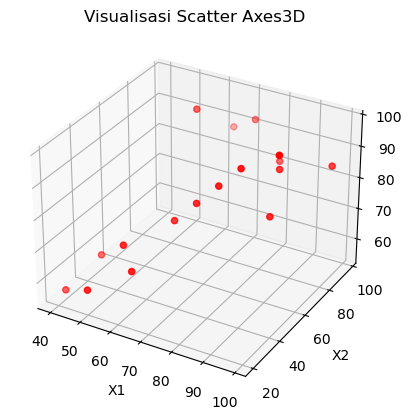

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_ryan['X1'], data_ryan['X2'], data_ryan['Y'], c='r', marker='o')
plt.title('Visualisasi Scatter Axes3D')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Scatter Axes3D')
plt.show()

### Prediksi hasil regresi untuk plot permukaan

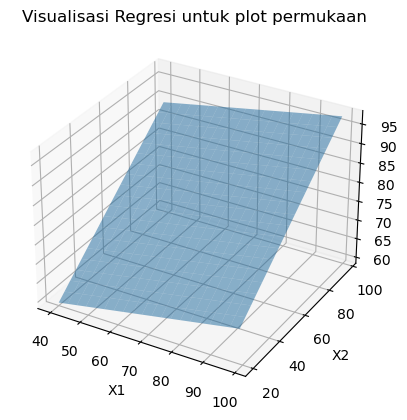

In [10]:
x1_range = np.linspace(data_ryan['X1'].min(), data_ryan['X1'].max(), 20)
x2_range = np.linspace(data_ryan['X2'].min(), data_ryan['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

data_to_predict = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
y_pred = regressi.predict(data_to_predict)
y_pred = y_pred.reshape(x1_mesh.shape)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

plt.title('Visualisasi Regresi untuk plot permukaan')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Regresi untuk plot permukaan')
plt.show()

### Uji Autokorelasi With Plot ACF

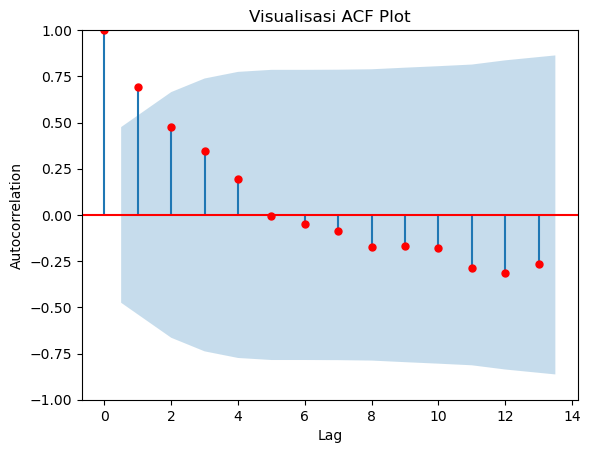

In [18]:
fig, ax = plt.subplots()
plot_acf(data_ryan['Y'], ax=ax, color='r')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.title('Visualisasi ACF Plot')

plt.savefig('Visualisasi ACF Plot')
plt.show()

### Uji Heteroskedastisitas¶

In [19]:
X = data_ryan[['X1','X2']]
y = data_ryan['Y']

X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result_het_white_test = het_white(result.resid, X)
print(result_het_white_test)

(7.745137324435799, 0.1708522580979586, 1.8411188486619001, 0.18524716918919457)


### Uji Multikolinieritas¶

In [20]:
Vrince_inflation_factor = pd.DataFrame()
Vrince_inflation_factor['VIF'] = [variance_inflation_factor(data_ryan.values, i) for i in range(data_ryan.shape[1])]
Vrince_inflation_factor.set_index(data_ryan.columns, inplace=True)

print(Vrince_inflation_factor)

             VIF
const  78.052211
X1      2.008387
X2      4.404115
Y       4.544167
